# Basic 2 - Q-learning with path finding problem
In this problem, we will learn:
1. How to navigate in a grid
2. Appling Q-learning formula to find path

The formula for Q-learning in this example we will be
`Q = Q + alpha*(reward - gamma * estimate of optimal future value - Q)`

Basic 2: given 4x4 grid with one finish line and 3 mines. Our goal is to find the path to finish line. Knowing that reward for finish line is 1 and mine is -10 each.
To navigate on the grid, we will have four directions in clock-wise order: up, right, down, left mapped with (0, -1), (1, 0), (0, 1), (-1, 0) respectively. 



In [9]:
import numpy as np

# Grid size
N = 4

# Finish line and mines
finish_line = (3, 2)
mines = [(1, 1), (2, 3), (3,1)]

# Rewards
rewards = np.zeros((N, N))
rewards[finish_line] = 1
for mine in mines:
    rewards[mine] = -10

# Hyperparameters
ALPHA = 0.1
GAMMA = 0.9
EPSILON = 0.1
EPISODES = 1000

# Initialize Q-table
Q = np.random.uniform(low=-1, high=1, size=(N, N, 4))
 # 4 actions: up, right, down, left


In [22]:
# Action mappings
actions = [(0, -1), (1, 0), (0, 1), (-1, 0)] # up, right, down, left

# Q-learning
for episode in range(EPISODES):
    state = (0, 0) # Start state
    done = False

    while not done:
        x, y = state
        # Choose action (epsilon-greedy)
        if np.random.rand() < EPSILON:
            action = np.random.randint(4)
        else:
            action = np.argmax(Q[x, y]) # get index max

        # Execute action
        x_new, y_new = x + actions[action][0], y + actions[action][1]
        # Stay within grid bounds
        x_new, y_new = max(0, min(x_new, N-1)), max(0, min(y_new, N-1))

        new_state = (x_new, y_new)

        # Receive reward
        reward = rewards[new_state] # -10 for mines, 1 for finish line and 0 for the rest

        # Update Q-value
        # np.max(Q[x_new, y_new] is estimated optimal future value
        Q[x, y, action] = Q[x, y, action] + ALPHA * (reward + GAMMA * np.max(Q[x_new, y_new]) - Q[x, y, action])

        state = new_state
        if state == finish_line or state in mines:
            done = True

# Find the best path
state = (0, 0)
path = [state]
def is_valid(x, y, N):
    """Check if the (x, y) coordinates are within the grid."""
    return 0 <= x < N and 0 <= y < N

while state != finish_line and state not in mines:
    x, y = state
    action = np.argmax(Q[x, y])
    new_x, new_y = x + actions[action][0], y + actions[action][1]
    # Check if the new state is valid
    if is_valid(new_x, new_y, N):
        state = (new_x, new_y)
        path.append(state)
    else:
        break

print("Best path:", path)


Best path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2)]


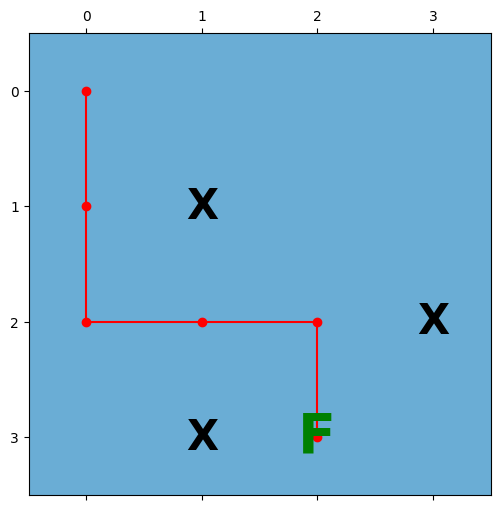

In [26]:
import matplotlib.pyplot as plt

# Extracting the x and y coordinates of the path
x_coords = [x[0] for x in path]
y_coords = [x[1] for x in path]

# Setup figure and axis
fig, ax = plt.subplots(figsize=(6,6))

# Set up a basic grid
ax.matshow([[0]*4 for _ in range(4)], cmap="Blues", vmin=-1, vmax=1)

# Plotting the path
ax.plot(y_coords, x_coords, color="red", marker="o")  # We use y_coords for x and x_coords for y due to the row-col nature of plotting

# Plotting the mines and finish line
for mine in mines:
    ax.text(mine[1], mine[0], 'X', ha='center', va='center', color='black', fontsize=30, weight='bold')

ax.text(finish_line[1], finish_line[0], 'F', ha='center', va='center', color='green', fontsize=40, weight='bold')

# Setting axis limits
ax.set_xlim(-0.5, 3.5)
ax.set_ylim(3.5, -0.5)

# Displaying the plot
plt.show()
